In [45]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

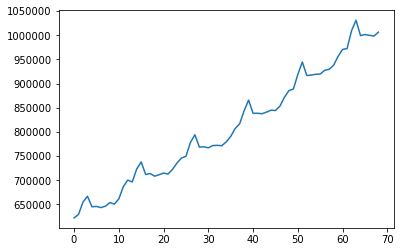

In [71]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('Tot_dep_2017_Aug_dda.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [82]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [110]:
# load the dataset
dataframe = pandas.read_csv('Tot_dep_2017_Aug_dda.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32') 

In [84]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [85]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

55 14


In [86]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [106]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [107]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [108]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(3, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
3s - loss: 0.1141
Epoch 2/1000
0s - loss: 0.0802
Epoch 3/1000
0s - loss: 0.0562
Epoch 4/1000
0s - loss: 0.0408
Epoch 5/1000
0s - loss: 0.0316
Epoch 6/1000
0s - loss: 0.0263
Epoch 7/1000
0s - loss: 0.0236
Epoch 8/1000
0s - loss: 0.0218
Epoch 9/1000
0s - loss: 0.0206
Epoch 10/1000
0s - loss: 0.0196
Epoch 11/1000
0s - loss: 0.0186
Epoch 12/1000
0s - loss: 0.0174
Epoch 13/1000
0s - loss: 0.0164
Epoch 14/1000
0s - loss: 0.0155
Epoch 15/1000
0s - loss: 0.0144
Epoch 16/1000
0s - loss: 0.0135
Epoch 17/1000
0s - loss: 0.0123
Epoch 18/1000
0s - loss: 0.0113
Epoch 19/1000
0s - loss: 0.0104
Epoch 20/1000
0s - loss: 0.0094
Epoch 21/1000
0s - loss: 0.0085
Epoch 22/1000
0s - loss: 0.0076
Epoch 23/1000
0s - loss: 0.0068
Epoch 24/1000
0s - loss: 0.0060
Epoch 25/1000
0s - loss: 0.0052
Epoch 26/1000
0s - loss: 0.0045
Epoch 27/1000
0s - loss: 0.0039
Epoch 28/1000
0s - loss: 0.0034
Epoch 29/1000
0s - loss: 0.0029
Epoch 30/1000
0s - loss: 0.0025
Epoch 31/1000
0s - loss: 0.0022
Epoch 32/1000
0s 

0s - loss: 0.0012
Epoch 254/1000
0s - loss: 0.0012
Epoch 255/1000
0s - loss: 0.0012
Epoch 256/1000
0s - loss: 0.0012
Epoch 257/1000
0s - loss: 0.0012
Epoch 258/1000
0s - loss: 0.0011
Epoch 259/1000
0s - loss: 0.0011
Epoch 260/1000
0s - loss: 0.0012
Epoch 261/1000
0s - loss: 0.0011
Epoch 262/1000
0s - loss: 0.0012
Epoch 263/1000
0s - loss: 0.0011
Epoch 264/1000
0s - loss: 0.0012
Epoch 265/1000
0s - loss: 0.0012
Epoch 266/1000
0s - loss: 0.0012
Epoch 267/1000
0s - loss: 0.0012
Epoch 268/1000
0s - loss: 0.0013
Epoch 269/1000
0s - loss: 0.0011
Epoch 270/1000
0s - loss: 0.0012
Epoch 271/1000
0s - loss: 0.0011
Epoch 272/1000
0s - loss: 0.0011
Epoch 273/1000
0s - loss: 0.0012
Epoch 274/1000
0s - loss: 0.0011
Epoch 275/1000
0s - loss: 0.0012
Epoch 276/1000
0s - loss: 0.0011
Epoch 277/1000
0s - loss: 0.0012
Epoch 278/1000
0s - loss: 0.0012
Epoch 279/1000
0s - loss: 0.0011
Epoch 280/1000
0s - loss: 0.0012
Epoch 281/1000
0s - loss: 0.0012
Epoch 282/1000
0s - loss: 0.0012
Epoch 283/1000
0s - loss:

0s - loss: 0.0011
Epoch 504/1000
0s - loss: 0.0011
Epoch 505/1000
0s - loss: 0.0011
Epoch 506/1000
0s - loss: 0.0012
Epoch 507/1000
0s - loss: 0.0011
Epoch 508/1000
0s - loss: 0.0011
Epoch 509/1000
0s - loss: 0.0012
Epoch 510/1000
0s - loss: 0.0011
Epoch 511/1000
0s - loss: 0.0012
Epoch 512/1000
0s - loss: 0.0011
Epoch 513/1000
0s - loss: 0.0012
Epoch 514/1000
0s - loss: 0.0012
Epoch 515/1000
0s - loss: 0.0011
Epoch 516/1000
0s - loss: 0.0011
Epoch 517/1000
0s - loss: 0.0012
Epoch 518/1000
0s - loss: 0.0012
Epoch 519/1000
0s - loss: 0.0012
Epoch 520/1000
0s - loss: 0.0012
Epoch 521/1000
0s - loss: 0.0012
Epoch 522/1000
0s - loss: 0.0012
Epoch 523/1000
0s - loss: 0.0012
Epoch 524/1000
0s - loss: 0.0012
Epoch 525/1000
0s - loss: 0.0012
Epoch 526/1000
0s - loss: 0.0011
Epoch 527/1000
0s - loss: 0.0011
Epoch 528/1000
0s - loss: 0.0011
Epoch 529/1000
0s - loss: 0.0012
Epoch 530/1000
0s - loss: 0.0012
Epoch 531/1000
0s - loss: 0.0012
Epoch 532/1000
0s - loss: 0.0011
Epoch 533/1000
0s - loss:

0s - loss: 0.0012
Epoch 754/1000
0s - loss: 0.0011
Epoch 755/1000
0s - loss: 0.0012
Epoch 756/1000
0s - loss: 0.0012
Epoch 757/1000
0s - loss: 0.0011
Epoch 758/1000
0s - loss: 0.0012
Epoch 759/1000
0s - loss: 0.0012
Epoch 760/1000
0s - loss: 0.0012
Epoch 761/1000
0s - loss: 0.0011
Epoch 762/1000
0s - loss: 0.0011
Epoch 763/1000
0s - loss: 0.0012
Epoch 764/1000
0s - loss: 0.0012
Epoch 765/1000
0s - loss: 0.0012
Epoch 766/1000
0s - loss: 0.0012
Epoch 767/1000
0s - loss: 0.0012
Epoch 768/1000
0s - loss: 0.0012
Epoch 769/1000
0s - loss: 0.0012
Epoch 770/1000
0s - loss: 0.0012
Epoch 771/1000
0s - loss: 0.0012
Epoch 772/1000
0s - loss: 0.0012
Epoch 773/1000
0s - loss: 0.0011
Epoch 774/1000
0s - loss: 0.0012
Epoch 775/1000
0s - loss: 0.0011
Epoch 776/1000
0s - loss: 0.0013
Epoch 777/1000
0s - loss: 0.0011
Epoch 778/1000
0s - loss: 0.0012
Epoch 779/1000
0s - loss: 0.0012
Epoch 780/1000
0s - loss: 0.0011
Epoch 781/1000
0s - loss: 0.0012
Epoch 782/1000
0s - loss: 0.0012
Epoch 783/1000
0s - loss:

In [100]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 13608.79 RMSE
Test Score: 16778.87 RMSE


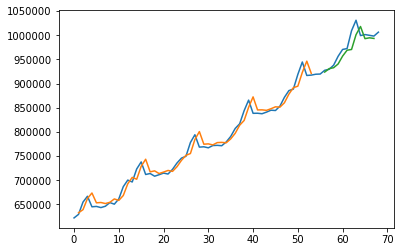

In [109]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
1s - loss: 0.1790
Epoch 2/100
0s - loss: 0.1276
Epoch 3/100
0s - loss: 0.0864
Epoch 4/100
0s - loss: 0.0538
Epoch 5/100
0s - loss: 0.0341
Epoch 6/100
0s - loss: 0.0244
Epoch 7/100
0s - loss: 0.0205
Epoch 8/100
0s - loss: 0.0181
Epoch 9/100
0s - loss: 0.0166
Epoch 10/100
0s - loss: 0.0151
Epoch 11/100
0s - loss: 0.0135
Epoch 12/100
0s - loss: 0.0121
Epoch 13/100
0s - loss: 0.0108
Epoch 14/100
0s - loss: 0.0096
Epoch 15/100
0s - loss: 0.0086
Epoch 16/100
0s - loss: 0.0076
Epoch 17/100
0s - loss: 0.0066
Epoch 18/100
0s - loss: 0.0058
Epoch 19/100
0s - loss: 0.0051
Epoch 20/100
0s - loss: 0.0045
Epoch 21/100
0s - loss: 0.0040
Epoch 22/100
0s - loss: 0.0037
Epoch 23/100
0s - loss: 0.0033
Epoch 24/100
0s - loss: 0.0030
Epoch 25/100
0s - loss: 0.0028
Epoch 26/100
0s - loss: 0.0026
Epoch 27/100
0s - loss: 0.0025
Epoch 28/100
0s - loss: 0.0024
Epoch 29/100
0s - loss: 0.0023
Epoch 30/100
0s - loss: 0.0023
Epoch 31/100
0s - loss: 0.0022
Epoch 32/100
0s - loss: 0.0022
Epoch 33/100
0s -

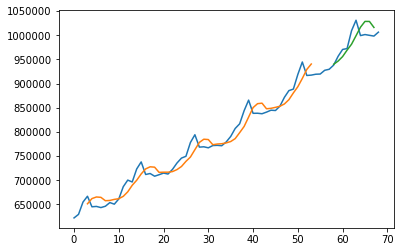

In [67]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('Tot_dep_2017_Aug_dda.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
2s - loss: 0.1068
Epoch 2/100
0s - loss: 0.0550
Epoch 3/100
0s - loss: 0.0289
Epoch 4/100
0s - loss: 0.0191
Epoch 5/100
0s - loss: 0.0160
Epoch 6/100
0s - loss: 0.0143
Epoch 7/100
0s - loss: 0.0127
Epoch 8/100
0s - loss: 0.0110
Epoch 9/100
0s - loss: 0.0096
Epoch 10/100
0s - loss: 0.0081
Epoch 11/100
0s - loss: 0.0068
Epoch 12/100
0s - loss: 0.0056
Epoch 13/100
0s - loss: 0.0047
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0025
Epoch 18/100
0s - loss: 0.0022
Epoch 19/100
0s - loss: 0.0020
Epoch 20/100
0s - loss: 0.0019
Epoch 21/100
0s - loss: 0.0019
Epoch 22/100
0s - loss: 0.0018
Epoch 23/100
0s - loss: 0.0018
Epoch 24/100
0s - loss: 0.0019
Epoch 25/100
0s - loss: 0.0018
Epoch 26/100
0s - loss: 0.0018
Epoch 27/100
0s - loss: 0.0018
Epoch 28/100
0s - loss: 0.0018
Epoch 29/100
0s - loss: 0.0018
Epoch 30/100
0s - loss: 0.0018
Epoch 31/100
0s - loss: 0.0018
Epoch 32/100
0s - loss: 0.0018
Epoch 33/100
0s -

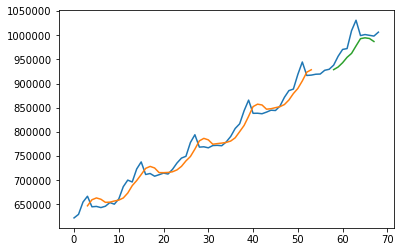

In [70]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('Tot_dep_2017_Aug_dda.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
2s - loss: 0.0751
Epoch 1/1
0s - loss: 0.0153
Epoch 1/1
0s - loss: 0.0198
Epoch 1/1
0s - loss: 0.0126
Epoch 1/1
0s - loss: 0.0078
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss:

0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0017
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0016
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Epoch 1/1
0s - loss: 0.0015
Ep

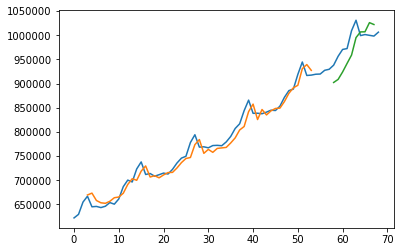

In [69]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('Tot_dep_2017_Aug_dda.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(500):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()